In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
from scipy.optimize import fsolve
from scipy.integrate import simpson
from numpy import trapz
from numpy.polynomial.polynomial import polyfit
from scipy import integrate

plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['axes.linewidth'] = 5

In [6]:
def arr_loc(val,X):
   ind = 0
   for i in range(len(X)):
      if(round(float(X[i]),2) == round(val,2)):
         ind = i
         break
   return ind

In [7]:
def kappa_half_filling_line_plots(Text_dir_charge_gap,Graph_dir,N,u_hf,dtau):


    filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[0],dtau)
    beta,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,3,4])

    print(beta)
    Kappa = np.zeros((len(beta))*len(u_hf))
    Kappa_std = np.zeros((len(beta))*len(u_hf))
    dK_dT = np.zeros((len(beta))*len(u_hf))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros((len(beta))*len(u_hf))  #dkappa_dT_std.tolist()
    T_val = np.zeros((len(beta))*len(u_hf))      #T.tolist()
    U_val = np.zeros((len(beta))*len(u_hf))      #[float(U[0])*x for x in [1]*len(Trot)]
    beta_len = len(beta)
    u_len = len(u_hf)
    
    for i in range(len(u_hf)):
        #print("Trot",Trot[k])
        start_ind = i*beta_len
        end_ind = (i+1)*beta_len
        filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[i],dtau)
        beta,kappa,kappa_std,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,1,2,3,4])
        T_val[start_ind:end_ind] = np.power(np.asarray(beta),1)
        Kappa[start_ind:end_ind] = np.copy(kappa)
        Kappa_std[start_ind:end_ind] = np.copy(kappa_std)
        dK_dT[start_ind:end_ind] = np.copy(dkdt)
        dK_dT_std[start_ind:end_ind] = np.copy(dkdt_std)
        U_val[start_ind:end_ind] = float(u_hf[i])*np.ones(len(beta))


    T = np.reshape(T_val,(len(u_hf),len(beta)))
    U = np.reshape(U_val,(len(u_hf),len(beta)))
    Kappa_hf = np.reshape(Kappa,(len(u_hf),len(beta)))
    Kappa_std_hf = np.reshape(Kappa_std,(len(u_hf),len(beta)))
    dK_dT_hf = np.reshape(dK_dT,(len(u_hf),len(beta)))
    dK_dT_hf_std = np.reshape(dK_dT_std,(len(u_hf),len(beta)))


    #print(Kappa_hf)    
    plt.figure(figsize = (25,20))
    plt.xticks([0,2,4,6,8,10],fontsize = 120)
    plt.yticks([0.0,0.1,0.2,0.3],fontsize = 120)
    plt.xlim(0,10.5)
    plt.ylim(-0.01,0.35)
    color = ["red","orange","blue"]
    c1 = 0
    for k in range(len(T[0,:])-1):
        temp_val = T[0,k]
        print(temp_val) 
        print(temp_val) 
        plt.errorbar(U[:,k],Kappa_hf[:,k],yerr = Kappa_std_hf[:,k],c=color[c1],marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
        c1 = c1+1 
    #plt.axhline(y=0,color = "black",linestyle = "dashed")
    plt.grid(True,which = "both")
    
    #plt.yscale('log')
    plt.legend(loc = "best", fontsize = 80)
    plt.tight_layout()
    plt.savefig("%s/Kappa_half_filling_N_%s.png"%(Graph_dir,N))

    

In [8]:
def dkappa_dT_half_filling_line_plots(Text_dir_charge_gap,Graph_dir,N,u_hf,dtau):


    filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[0],dtau)
    beta,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,3,4])

    print(beta)
    Kappa = np.zeros((len(beta))*len(u_hf))
    Kappa_std = np.zeros((len(beta))*len(u_hf))
    dK_dT = np.zeros((len(beta))*len(u_hf))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros((len(beta))*len(u_hf))  #dkappa_dT_std.tolist()
    T_val = np.zeros((len(beta))*len(u_hf))      #T.tolist()
    U_val = np.zeros((len(beta))*len(u_hf))      #[float(U[0])*x for x in [1]*len(Trot)]
    beta_len = len(beta)
    u_len = len(u_hf)
    
    #max_den = np.zeros(len(beta))
    #Temp = np.zeros(len(beta))
    #nfit = np.arange(1.0,1.5,0.005)

    
    for i in range(len(u_hf)):
        #print("Trot",Trot[k])
        start_ind = i*beta_len
        end_ind = (i+1)*beta_len
        filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[i],dtau)
        beta,kappa,kappa_std,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,1,2,3,4])
        T_val[start_ind:end_ind] = np.power(np.asarray(beta),1)
        Kappa[start_ind:end_ind] = np.copy(kappa)
        Kappa_std[start_ind:end_ind] = np.copy(kappa_std)
        dK_dT[start_ind:end_ind] = np.copy(dkdt)
        dK_dT_std[start_ind:end_ind] = np.copy(dkdt_std)
        U_val[start_ind:end_ind] = float(u_hf[i])*np.ones(len(beta))


    T = np.reshape(T_val,(len(u_hf),len(beta)))
    U = np.reshape(U_val,(len(u_hf),len(beta)))
    Kappa_hf = np.reshape(Kappa,(len(u_hf),len(beta)))
    Kappa_std_hf = np.reshape(Kappa_std,(len(u_hf),len(beta)))
    dK_dT_hf = np.reshape(dK_dT,(len(u_hf),len(beta)))
    dK_dT_hf_std = np.reshape(dK_dT_std,(len(u_hf),len(beta)))


    plt.figure(figsize = (25,20))
    plt.xticks([3,3.5,4,4.5,5,5.5],fontsize = 120)
    plt.yticks([-0.02,0.0,0.02,0.04,0.06],fontsize = 120)
    color = ["red","orange","blue"] #,"purple"]
    plt.xlim(3,5.1)
    #c1 = 0
    c5 = 0
    c6 = 0
    c1 = 0
    for k in range(len(T[0,:])):
        temp_val = T[0,k]
        if round(temp_val,2) == 0.50 or c5 == 0:
           plt.errorbar(U[:,k],dK_dT_hf[:,k],yerr = dK_dT_hf_std[:,k],c='blue',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c5 = c5+1
        if round(temp_val,3) == 0.667 or c6 == 0:
           plt.errorbar(U[:,k],dK_dT_hf[:,k],yerr = dK_dT_hf_std[:,k],c='orange',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c6 = c6+1
        if round(temp_val,2) == 1.0 or c1 ==0:
           plt.errorbar(U[:,k],dK_dT_hf[:,k],yerr = dK_dT_hf_std[:,k],c='red',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c1 = c1+1
            
    plt.axhline(y=0,color = "black",linestyle = "dashed")
    plt.grid(True,which = "both")
    plt.legend(loc = "best", fontsize = 80)
    plt.tight_layout()
    plt.savefig("%s/dKappa_dT_half_filling_N_%s.png"%(Graph_dir,N))
    
    #U_val = np.zeros(len(U_hf))
    #for i in range(len(U_hf)):
    #    U_val[i] = float(U_hf[i])
    #    filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap_hf,N,U_hf[i],dtau)
    #    trot,dk_dt,dk_dt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,1,2])
    #    dk_dT[i,:] = np.copy(dk_dt)
    #    dk_dT_std[i,:] = np.copy(dk_dt_std)

    #T_val = np.zeros(len(Trot))
    #for k in range(len(Trot)):
    #    T_val[k] = 1/(float(dtau)*float(Trot[k]))

    

In [9]:
def dkappa_dT_half_filling_line_plots_v2(Text_dir_charge_gap,Graph_dir,N,u_hf,dtau):


    filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[0],dtau)
    T,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,3,4])

    print(T)
    Kappa = np.zeros((len(T),len(u_hf)))
    Kappa_std = np.zeros((len(T),len(u_hf)))
    dK_dT = np.zeros((len(T),len(u_hf)))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros((len(T),len(u_hf)))  #dkappa_dT_std.tolist()
    T_val = np.zeros((len(T),len(u_hf)))      #T.tolist()
    U = np.zeros((len(T),len(u_hf)))      #[float(U[0])*x for x in [1]*len(Trot)]
    T_len = len(T)
    u_len = len(u_hf)
    
    #max_den = np.zeros(len(beta))
    #Temp = np.zeros(len(beta))
    #nfit = np.arange(1.0,1.5,0.005)

    
    for i in range(len(u_hf)):
        filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[i],dtau)
        T,kappa,kappa_std,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,1,2,3,4])
        T_val[:,i] = np.copy(T) #(np.asarray(beta),1)
        Kappa[:,i] = np.copy(kappa)
        Kappa_std[:,i] = np.copy(kappa_std)
        dK_dT[:,i] = np.copy(dkdt)
        dK_dT_std[:,i] = np.copy(dkdt_std)
        U[:,i] = float(u_hf[i])*np.ones(len(T))


    #T = np.reshape(T_val,(len(u_hf),len(beta)))
    #U = np.reshape(U_val,(len(u_hf),len(beta)))
    #Kappa_hf = np.reshape(Kappa,(len(u_hf),len(beta)))
    #Kappa_std_hf = np.reshape(Kappa_std,(len(u_hf),len(beta)))
    #dK_dT_hf = np.reshape(dK_dT,(len(u_hf),len(beta)))
    #dK_dT_hf_std = np.reshape(dK_dT_std,(len(u_hf),len(beta)))


    plt.figure(figsize = (25,20))
    plt.xticks([3,3.5,4,4.5,5,5.5],fontsize = 120)
    plt.yticks([-0.02,0.0,0.02,0.04,0.06],fontsize = 120)
    color = ["red","orange","blue"] #,"purple"]
    plt.xlim(3,5.1)
    #c1 = 0
    c5 = 0
    c6 = 0
    c1 = 0

    print("T",T)
    for k in range(len(T)):
        temp_val = T[k]
        if round(temp_val,2) == 0.50:
           plt.errorbar(U[k,:],dK_dT[k,:],yerr = dK_dT_std[k,:],c='blue',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c5 = c5+1
        if round(temp_val,3) == 0.667:
           plt.errorbar(U[k,:],dK_dT[k,:],yerr = dK_dT_std[k,:],c='orange',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c6 = c6+1
        if round(temp_val,2) == 1.0:
           plt.errorbar(U[k,:],dK_dT[k,:],yerr = dK_dT_std[k,:],c='red',marker = "o",markersize = 25,elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c1 = c1+1
            
    plt.axhline(y=0,color = "black",linestyle = "dashed")
    plt.grid(True,which = "both")
    plt.legend(loc = "best", fontsize = 80)
    plt.tight_layout()
    plt.savefig("%s/dKappa_dT_half_filling_N_%s.png"%(Graph_dir,N))
    

    

In [18]:
def dkappa_dT_half_filling_line_plots_scaling(Graph_dir,N1,N2,u_hf,dtau):


    Text_dir_charge_gap_n1 = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap_half_filling/Text_files_N_%s_dtau_%s"%(N1,N1,dtau)
    Text_dir_charge_gap_n2 = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap_half_filling/Text_files_N_%s_dtau_%s"%(N2,N2,dtau)

    #======================doing stuff for N1=10x10============================
    
    filename_dK_dT_n1 = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap_n1,N1,u_hf[0],dtau)
    T_n1,dkdt_n1,dkdt_std_n1 = np.loadtxt(filename_dK_dT_n1,unpack = 'True',usecols = [0,3,4])

    #print(T)
    Kappa_n1 = np.zeros((len(T_n1),len(u_hf)))
    Kappa_std_n1 = np.zeros((len(T_n1),len(u_hf)))
    dK_dT_n1 = np.zeros((len(T_n1),len(u_hf)))      #dkappa_dT.tolist()
    dK_dT_std_n1 = np.zeros((len(T_n1),len(u_hf)))  #dkappa_dT_std.tolist()
    T_val_n1 = np.zeros((len(T_n1),len(u_hf)))      #T.tolist()
    U_n1 = np.zeros((len(T_n1),len(u_hf)))      #[float(U[0])*x for x in [1]*len(Trot)]
    T_len_n1 = len(T_n1)
    u_len_n1 = len(u_hf)
    

    
    for i in range(len(u_hf)):
        print("U", u_hf[i])
        filename_dK_dT_n1 = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap_n1,N1,u_hf[i],dtau)
        T_n1,kappa_n1,kappa_std_n1,dkdt_n1,dkdt_std_n1 = np.loadtxt(filename_dK_dT_n1,unpack = 'True',usecols = [0,1,2,3,4])
        T_val_n1[:,i] = np.copy(T_n1) #(np.asarray(beta),1)
        Kappa_n1[:,i] = np.copy(kappa_n1)
        Kappa_std_n1[:,i] = np.copy(kappa_std_n1)
        dK_dT_n1[:,i] = np.copy(dkdt_n1)
        dK_dT_std_n1[:,i] = np.copy(dkdt_std_n1)
        U_n1[:,i] = float(u_hf[i])*np.ones(len(T_n1))


    #======================doing stuff for N2=16x16============================
    
    filename_dK_dT_n2 = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap_n2,N2,u_hf[0],dtau)
    T_n2,dkdt_n2,dkdt_std_n2 = np.loadtxt(filename_dK_dT_n2,unpack = 'True',usecols = [0,3,4])

    #print(T)
    Kappa_n2 = np.zeros((len(T_n2),len(u_hf)))
    Kappa_std_n2 = np.zeros((len(T_n2),len(u_hf)))
    dK_dT_n2 = np.zeros((len(T_n2),len(u_hf)))      #dkappa_dT.tolist()
    dK_dT_std_n2 = np.zeros((len(T_n2),len(u_hf)))  #dkappa_dT_std.tolist()
    T_val_n2 = np.zeros((len(T_n2),len(u_hf)))      #T.tolist()
    U_n2 = np.zeros((len(T_n2),len(u_hf)))      #[float(U[0])*x for x in [1]*len(Trot)]
    T_len_n2 = len(T_n2)
    u_len_n2 = len(u_hf)
    

    
    for i in range(len(u_hf)):
        filename_dK_dT_n2 = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap_n2,N2,u_hf[i],dtau)
        T_n2,kappa_n2,kappa_std_n2,dkdt_n2,dkdt_std_n2 = np.loadtxt(filename_dK_dT_n2,unpack = 'True',usecols = [0,1,2,3,4])
        T_val_n2[:,i] = np.copy(T_n2) #(np.asarray(beta),1)
        Kappa_n2[:,i] = np.copy(kappa_n2)
        Kappa_std_n2[:,i] = np.copy(kappa_std_n2)
        dK_dT_n2[:,i] = np.copy(dkdt_n2)
        dK_dT_std_n2[:,i] = np.copy(dkdt_std_n2)
        U_n2[:,i] = float(u_hf[i])*np.ones(len(T_n2))


    #======================================================Comparing system sizes =============================
    
    plt.figure(figsize = (25,20))
    plt.xticks([3,3.5,4,4.5,5,5.5],fontsize = 120)
    plt.yticks([-0.02,0.0,0.02,0.04,0.06],fontsize = 120)
    color = ["red","orange","blue"] #,"purple"]
    plt.xlim(3,5.1)
    #c1 = 0
    c5 = 0
    c6 = 0
    c1 = 0

    #print("T",T)
    for k in range(len(T_n1)):
        temp_val = T_n1[k]
        if round(temp_val,2) == 0.50:
           plt.errorbar(U_n1[k,:],dK_dT_n1[k,:],yerr = dK_dT_std_n1[k,:],c='blue',marker = "o",markersize = 25,fillstyle = 'none',elinewidth = 3,capsize = 5,label = "N=10x10")  #%str(round(temp_val,3)))
           plt.errorbar(U_n2[k,:],dK_dT_n2[k,:],yerr = dK_dT_std_n2[k,:],c='blue',marker = "o",markersize = 15,elinewidth = 3,capsize = 5,label = "N=16x16") #,label = "T=%s"%str(round(temp_val,3)))
           c5 = c5+1
        if round(temp_val,3) == 0.667:
           plt.errorbar(U_n1[k,:],dK_dT_n1[k,:],yerr = dK_dT_std_n1[k,:],c='orange',marker = "o",markersize = 25,fillstyle = 'none',elinewidth = 3,capsize = 5) #,label = "T=%s"%str(round(temp_val,3)))
           plt.errorbar(U_n2[k,:],dK_dT_n2[k,:],yerr = dK_dT_std_n2[k,:],c='orange',marker = "o",markersize = 15,elinewidth = 3,capsize = 5) #,label = "T=%s"%str(round(temp_val,3)))
          
           c6 = c6+1
        if round(temp_val,2) == 1.0:
           plt.errorbar(U_n1[k,:],dK_dT_n1[k,:],yerr = dK_dT_std_n1[k,:],c='red',marker = "o",markersize = 25,fillstyle = 'none',elinewidth = 3,capsize = 5) #,label = "T=%s"%str(round(temp_val,3)))
           plt.errorbar(U_n2[k,:],dK_dT_n2[k,:],yerr = dK_dT_std_n2[k,:],c='red',marker = "o",markersize = 15,elinewidth = 3,capsize = 5) #,label = "T=%s"%str(round(temp_val,3)))
           
           c1 = c1+1
            
    plt.axhline(y=0,color = "black",linestyle = "dashed")
    plt.grid(True,which = "both")
    plt.legend(loc = "lower right", fontsize = 80)
    plt.tight_layout()
    plt.savefig("%s/dKappa_dT_half_filling_size_scaling.png"%(Graph_dir))
    
    #========================== Plotting for 10x10 ===================================================


    plt.figure(figsize = (25,20))
    plt.xticks([3,3.5,4,4.5,5,5.5],fontsize = 120)
    plt.yticks([-0.02,0.0,0.02,0.04,0.06],fontsize = 120)
    color = ["red","orange","blue"] #,"purple"]
    plt.xlim(3,5.1)
    #c1 = 0
    c5 = 0
    c6 = 0
    c1 = 0

    #print("T",T)
    for k in range(len(T_n1)):
        temp_val = T_n1[k]
        if round(temp_val,2) == 0.50:
           plt.errorbar(U_n1[k,:],dK_dT_n1[k,:],yerr = dK_dT_std_n1[k,:],c='blue',marker = "o",markersize = 25,fillstyle = 'none',elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c5 = c5+1
        if round(temp_val,3) == 0.667:
           plt.errorbar(U_n1[k,:],dK_dT_n1[k,:],yerr = dK_dT_std_n1[k,:],c='orange',marker = "o",markersize = 25,fillstyle = 'none',elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c6 = c6+1
        if round(temp_val,2) == 1.0:
           plt.errorbar(U_n1[k,:],dK_dT_n1[k,:],yerr = dK_dT_std_n1[k,:],c='red',marker = "o",markersize = 25,fillstyle = 'none',elinewidth = 3,capsize = 5,label = "T=%s"%str(round(temp_val,3)))
           c1 = c1+1
            
    plt.axhline(y=0,color = "black",linestyle = "dashed")
    plt.grid(True,which = "both")
    #plt.legend(loc = "best", ncol = 3,fontsize = 80)
    plt.tight_layout()
    plt.savefig("%s/dKappa_dT_half_filling_size_N_%s.png"%(Graph_dir,N1))
    


    #========================== Plotting for 16x16 ===================================================


    plt.figure(figsize = (25,20))
    plt.xticks([3,3.5,4,4.5,5,5.5],fontsize = 120)
    plt.yticks([-0.02,0.0,0.02,0.04,0.06],fontsize = 120)
    color = ["red","orange","blue"] #,"purple"]
    plt.xlim(3,5.1)
    #c1 = 0
    c5 = 0
    c6 = 0
    c1 = 0

    #print("T",T)
    for k in range(len(T_n1)):
        temp_val = T_n1[k]
        if round(temp_val,2) == 0.50:
           plt.errorbar(U_n2[k,:],dK_dT_n2[k,:],yerr = dK_dT_std_n2[k,:],c='blue',marker = "o",markersize = 25,elinewidth = 3,capsize = 5) #,label = "T=%s"%str(round(temp_val,3)))
           c5 = c5+1
        if round(temp_val,3) == 0.667:
           plt.errorbar(U_n2[k,:],dK_dT_n2[k,:],yerr = dK_dT_std_n2[k,:],c='orange',marker = "o",markersize = 25,elinewidth = 3,capsize = 5) #,label = "T=%s"%str(round(temp_val,3)))
          
           c6 = c6+1
        if round(temp_val,2) == 1.0:
           plt.errorbar(U_n2[k,:],dK_dT_n2[k,:],yerr = dK_dT_std_n2[k,:],c='red',marker = "o",markersize = 25,elinewidth = 3,capsize = 5) #,label = "T=%s"%str(round(temp_val,3)))
           
           c1 = c1+1
            
    plt.axhline(y=0,color = "black",linestyle = "dashed")
    plt.grid(True,which = "both")
    #plt.legend(loc = "best", fontsize = 80)
    plt.tight_layout()
    plt.savefig("%s/dKappa_dT_half_filling_N_%s.png"%(Graph_dir,N2))
    

    

In [19]:
def charge_gap_contour_plots(Text_dir_charge_gap,Graph_dir_charge_gap,N,u_hf,dtau):
    
    filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[0],dtau)
    beta,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,3,4])

    print(beta)
    dK_dT = np.zeros((len(beta))*len(u_hf))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros((len(beta))*len(u_hf))  #dkappa_dT_std.tolist()
    T_val = np.zeros((len(beta))*len(u_hf))      #T.tolist()
    U_val = np.zeros((len(beta))*len(u_hf))      #[float(U[0])*x for x in [1]*len(Trot)]
    beta_len = len(beta)
    u_len = len(u_hf)
    
    #max_den = np.zeros(len(beta))
    #Temp = np.zeros(len(beta))
    #nfit = np.arange(1.0,1.5,0.005)

    
    for i in range(len(u_hf)):
        #print("Trot",Trot[k])
        start_ind = i*beta_len
        end_ind = (i+1)*beta_len
        filename_dK_dT = "%s/Charge_gap_half_filling_data_N_%s_U_%s_dtau_%s.dat"%(Text_dir_charge_gap,N,u_hf[i],dtau)
        beta,dkdt,dkdt_std = np.loadtxt(filename_dK_dT,unpack = 'True',usecols = [0,3,4])
        T_val[start_ind:end_ind] = np.power(np.asarray(beta),1)
        dK_dT[start_ind:end_ind] = np.copy(dkdt)
        dK_dT_std[start_ind:end_ind] = np.copy(dkdt_std)
        U_val[start_ind:end_ind] = float(u_hf[i])*np.ones(len(beta))
        #hf_ind = find_nearest(num_den,1.0)
        #n_ind = find_nearest(num_den,1.5)
        #cs = CubicSpline(num_den[hf_ind:n_ind],-1*s_k[hf_ind:n_ind])
        #S_fit = cs(nfit)
        #idx = np.argmin(S_fit)     
        #print("hf_end,n_end",hf_ind,num_den[hf_ind],n_ind,num_den[n_ind])
        #print(s_k[hf_ind:n_ind])
        #max_den[k] = nfit[idx]
        #Temp[k] = 1/float(beta[k])

    print(T_val)
    #print(U_val)
    #print("max_den",max_den)
    U_grid = np.linspace(np.nanmin(U_val),np.nanmax(U_val),num = 2*len(u_hf))
    T_grid = np.linspace(np.nanmin(T_val),np.nanmax(T_val),num=2*(len(beta)))
    U_mesh,T_mesh = np.meshgrid(U_grid,T_grid,indexing = 'xy')
    grid_k_c = griddata(np.stack((T_val,U_val),axis=1),dK_dT,(T_mesh,U_mesh),method = 'cubic')
    
    cm = matplotlib.colormaps.get_cmap('seismic')

    # get index of max value for each row
    #idx = np.argmax(grid_s_c, axis=1)
    # use idx to get the x-axis values from T that correspond to max XA
    #x = np.take_along_axis(N_grid, np.expand_dims(idx, axis=-1), axis=-1).squeeze(axis=-1)
    
    #use idx to get the max y-axis values from XA
    #y = np.take_along_axis(T_grid, np.expand_dims(idx, axis=-1), axis=-1).squeeze(axis=-1)


    plt.figure()
    plt.figure(figsize = (25,20))
    ax = plt.gca()
    #plt.xlabel(r"$U$",fontsize = 40)
    #plt.ylabel(r"$T$",fontsize = 40)
    plt.xticks([3.50,4.00,4.50,5.00],fontsize = 80)
    plt.yticks(fontsize = 80)
    im = plt.contourf(U_mesh,T_mesh,grid_k_c,np.arange(-0.05, 0.05, .001),extend='both',cmap = cm)
    #plt.plot(max_den,Temp,color='green',linestyle = 'dashed',linewidth = 5)
    #plt.xlim(1.0,1.4)
    plt.gca().set_ylim(bottom=0.35,top=1.0)
    plt.grid('True',which = 'both')
    CS_2 = ax.contour(U_mesh,T_mesh,grid_k_c, [0.0], colors = ['black'], linestyles = ['dashed'],linewidths = [5])
    #CS_2 = ax.contour(U_mesh,T_mesh,grid_k_c, [0.0], colors = ['green'], linestyles = ['dotted'],linewidths = [5])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax= cax)
    cbar.ax.tick_params(labelsize = 60)
    plt.tight_layout()
    plt.savefig("%s/dKappa_dT_half_filling_N_%s_dtau_%s_contour.png"%(Graph_dir_charge_gap,N,dtau))
    
    dat0= CS_2.allsegs
    print("charge_gap",dat0)          


In [20]:
def main():

    N1 = "10"
    N2 = "16"
    dtau = "0.05"
    #U_hf = ["1.0","2.0","3.0","4.0","5.0","6.0","7.0","10.0"] 
    
    U_hf = ["3.30","3.40","3.50","3.60","3.70","3.80","4.00","4.10","4.20","4.30","4.40","4.50","5.00"] #["3.20","3.30","3.40","3.50","3.60","3.70","3.80","3.90","4.00","4.10","4.20","4.30","4.40","4.50","4.60", \
            #"4.70","4.80","4.90","5.00","5.10","5.20","5.30"]
    Trot = ["20","30","40"] #,"50"] #["18","20","22","24","26","28","30","32","34","36","38","40","42","44","46","48","50","52","54","56","58","60","62"]
    #Text_dir_charge_gap = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap_half_filling/Text_files_N_%s_dtau_%s"%(N,N,dtau)
    Graph_dir_charge_gap = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_half_filling/Graphs_N_%s_charge_gap"%(N1,N1)

    if not os.path.exists(Graph_dir_charge_gap):
       os.makedirs(Graph_dir_charge_gap) 

    #charge_gap_contour_plots(Text_dir_charge_gap,Graph_dir_charge_gap,N,U_hf,dtau)
    dkappa_dT_half_filling_line_plots_scaling(Graph_dir_charge_gap,N1,N2,U_hf,dtau)
    #kappa_half_filling_line_plots(Text_dir_charge_gap,Graph_dir_charge_gap,N,U_hf,dtau)


    x = np.linspace(0,10,num = 1001)
    y1 = 18*x+2
    y2 = 10*(x-0.00)**2+2


    plt.figure(figsize = (25,20))
    plt.xticks([])
    plt.yticks([])
    plt.plot(x,y1,color = 'red', linewidth = 5, label = r"$T_{c}^{\text{TDOS}}$")
    plt.plot(x,y2,color ='blue',linewidth = 5, label = r"$T_{c}^{\text{LDOS}}$")
    plt.xlim(0,1)
    plt.ylim(3,10)
    plt.legend(loc = 'lower right', fontsize = 100)
    plt.tight_layout()
    plt.savefig("%s/Metal_insulator_crossover.png"%Graph_dir_charge_gap)         



U 3.30
U 3.40
U 3.50
U 3.60
U 3.70
U 3.80
U 4.00
U 4.10
U 4.20
U 4.30
U 4.40
U 4.50
U 5.00


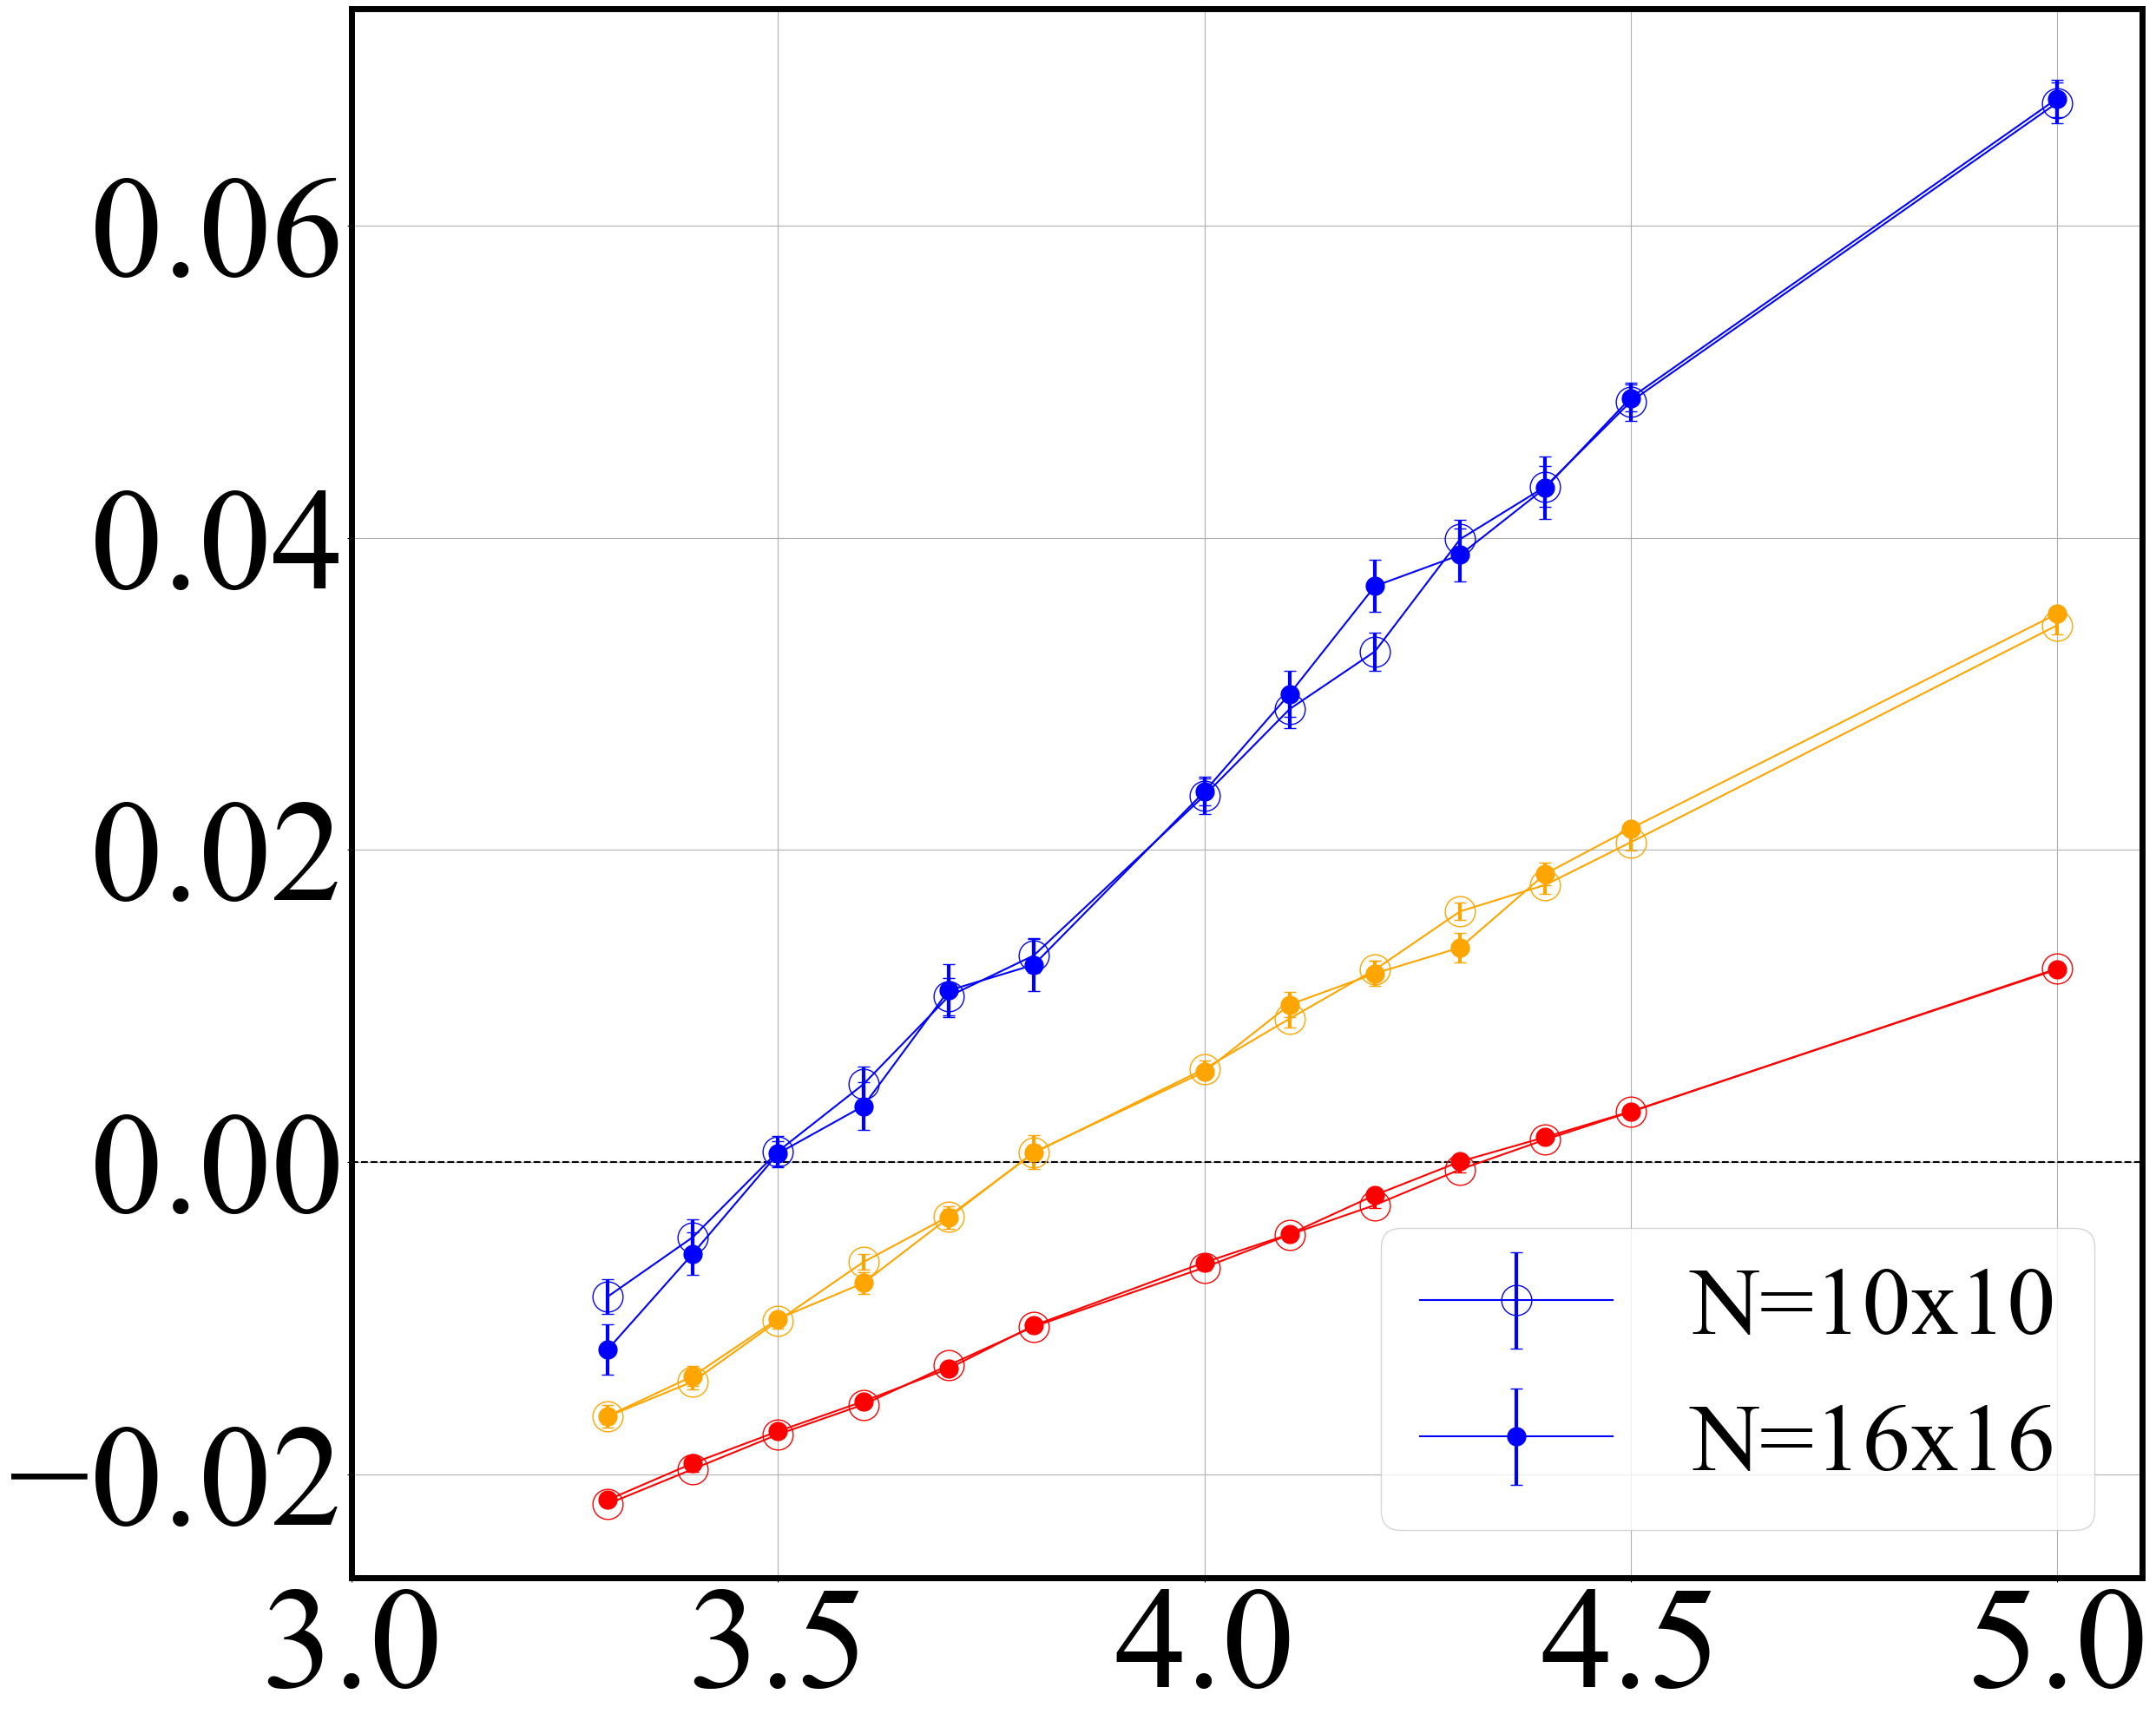

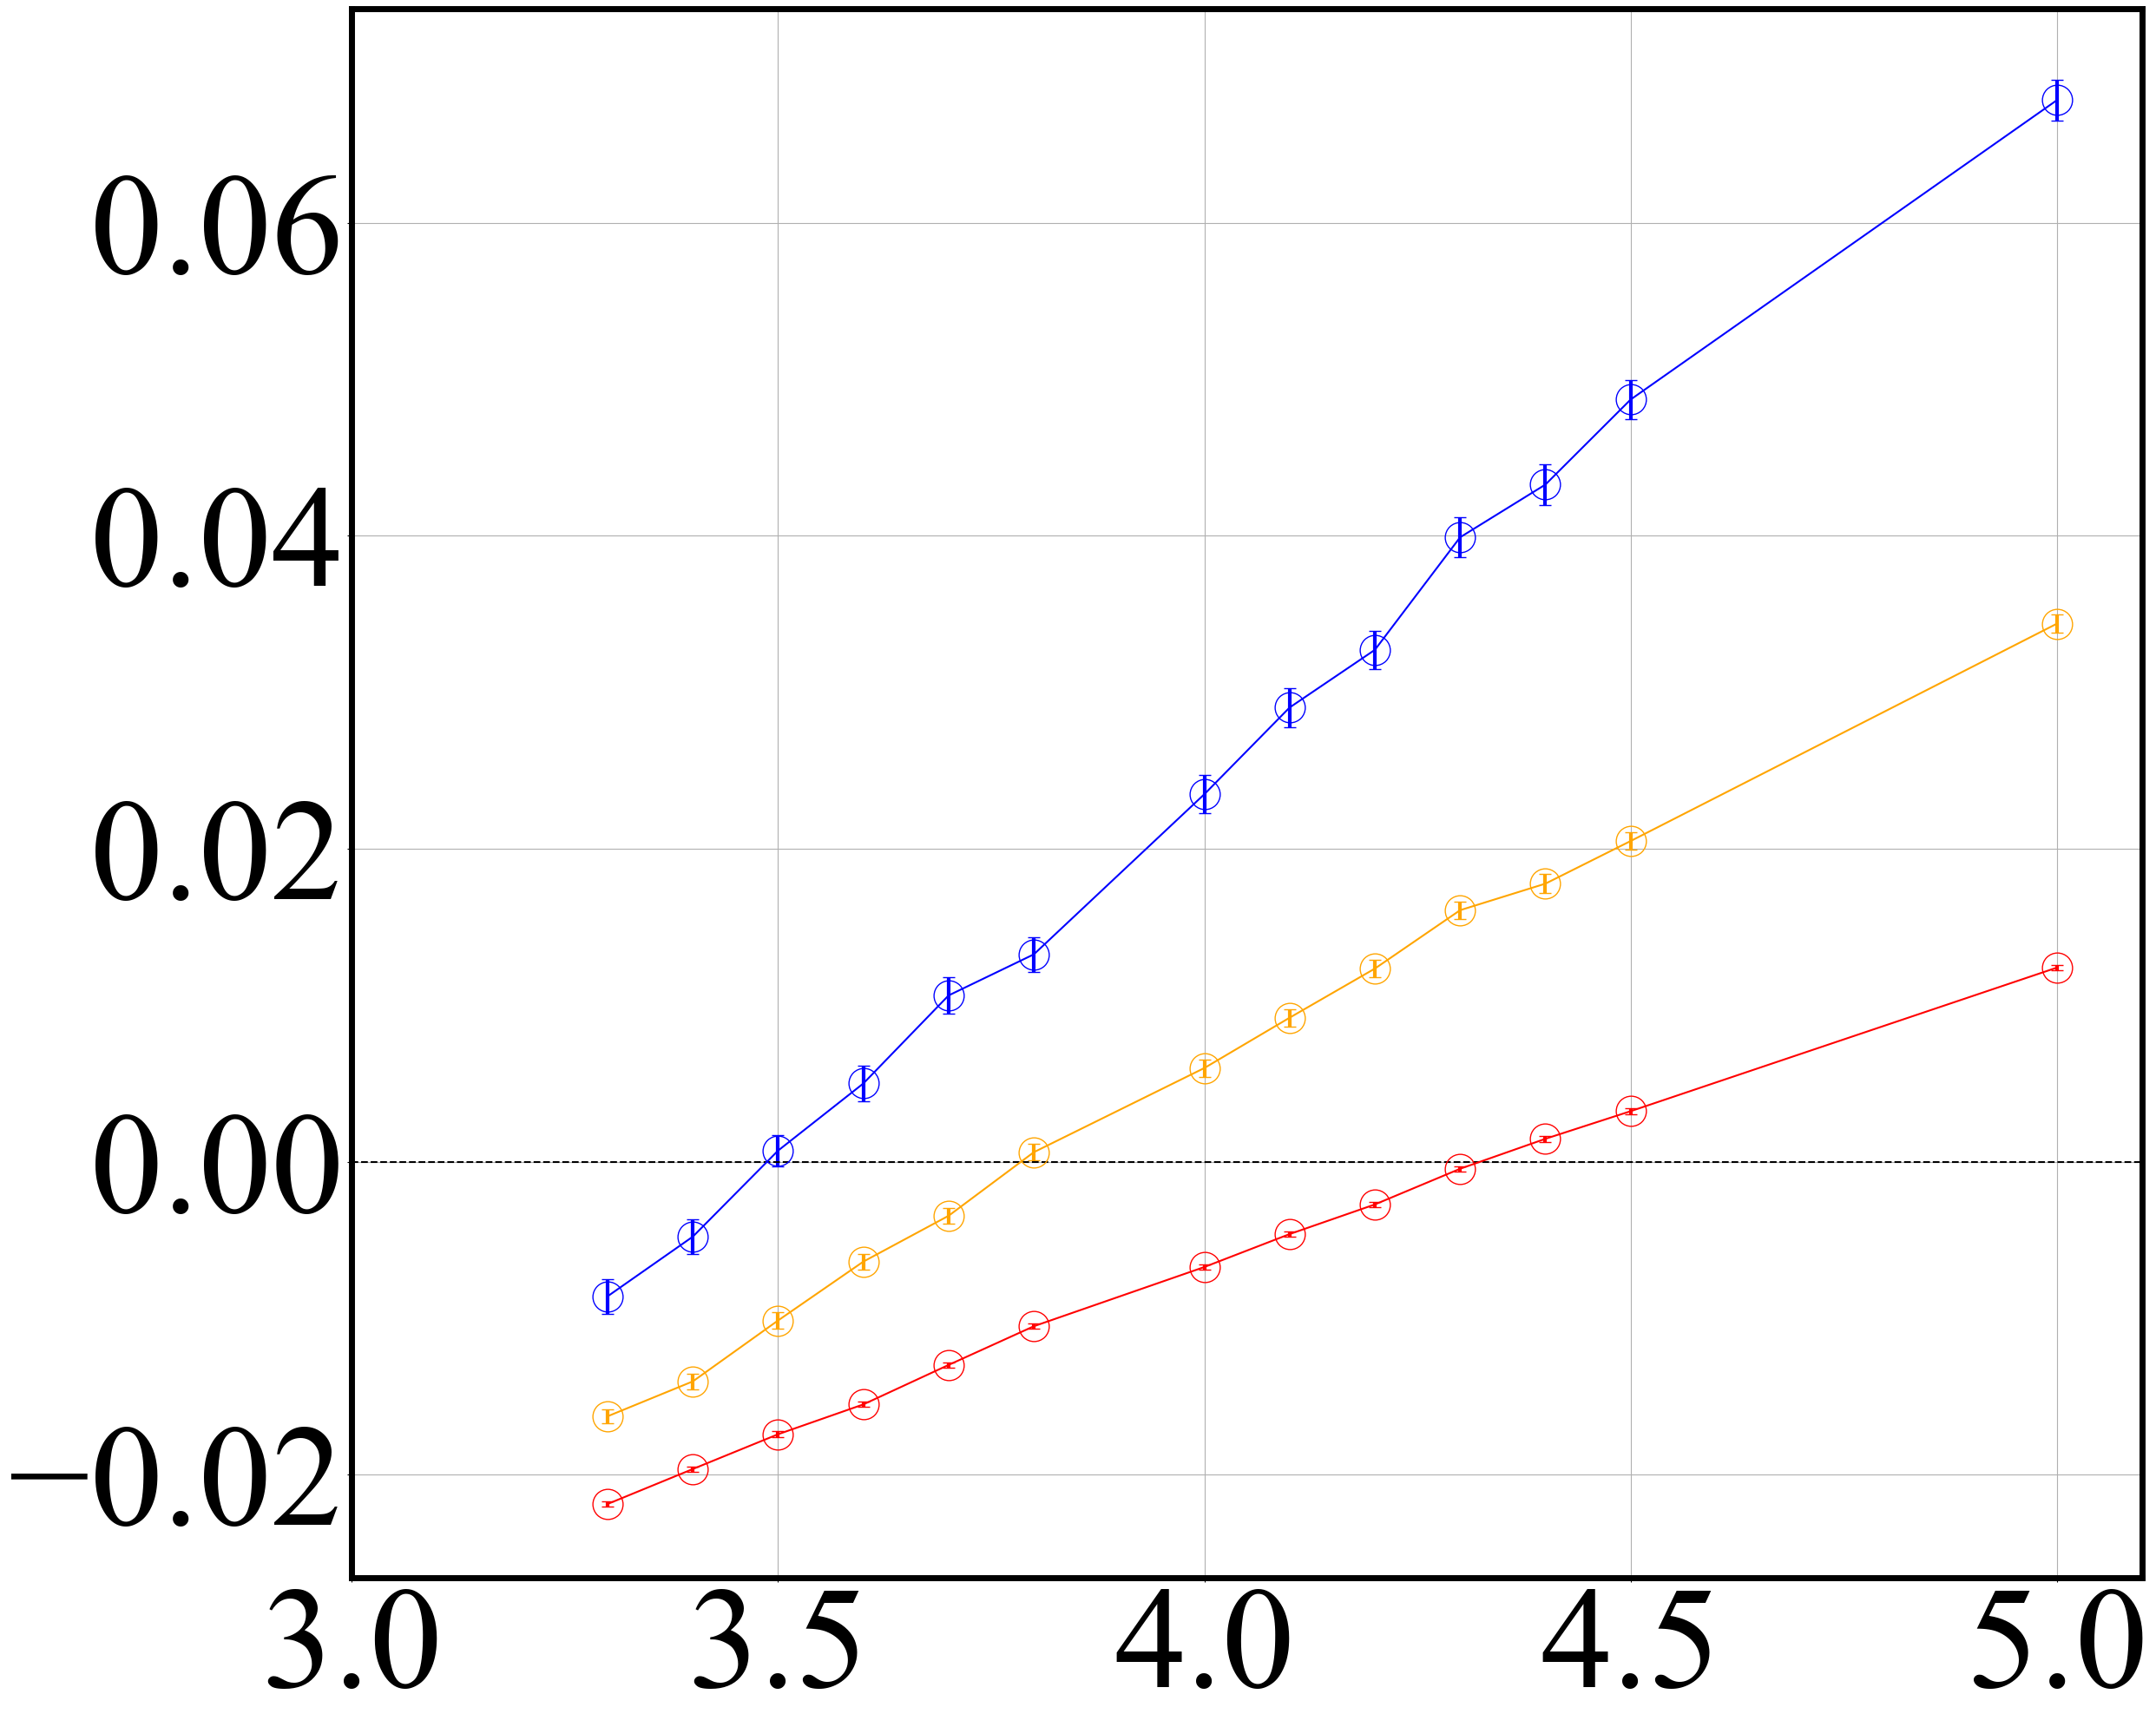

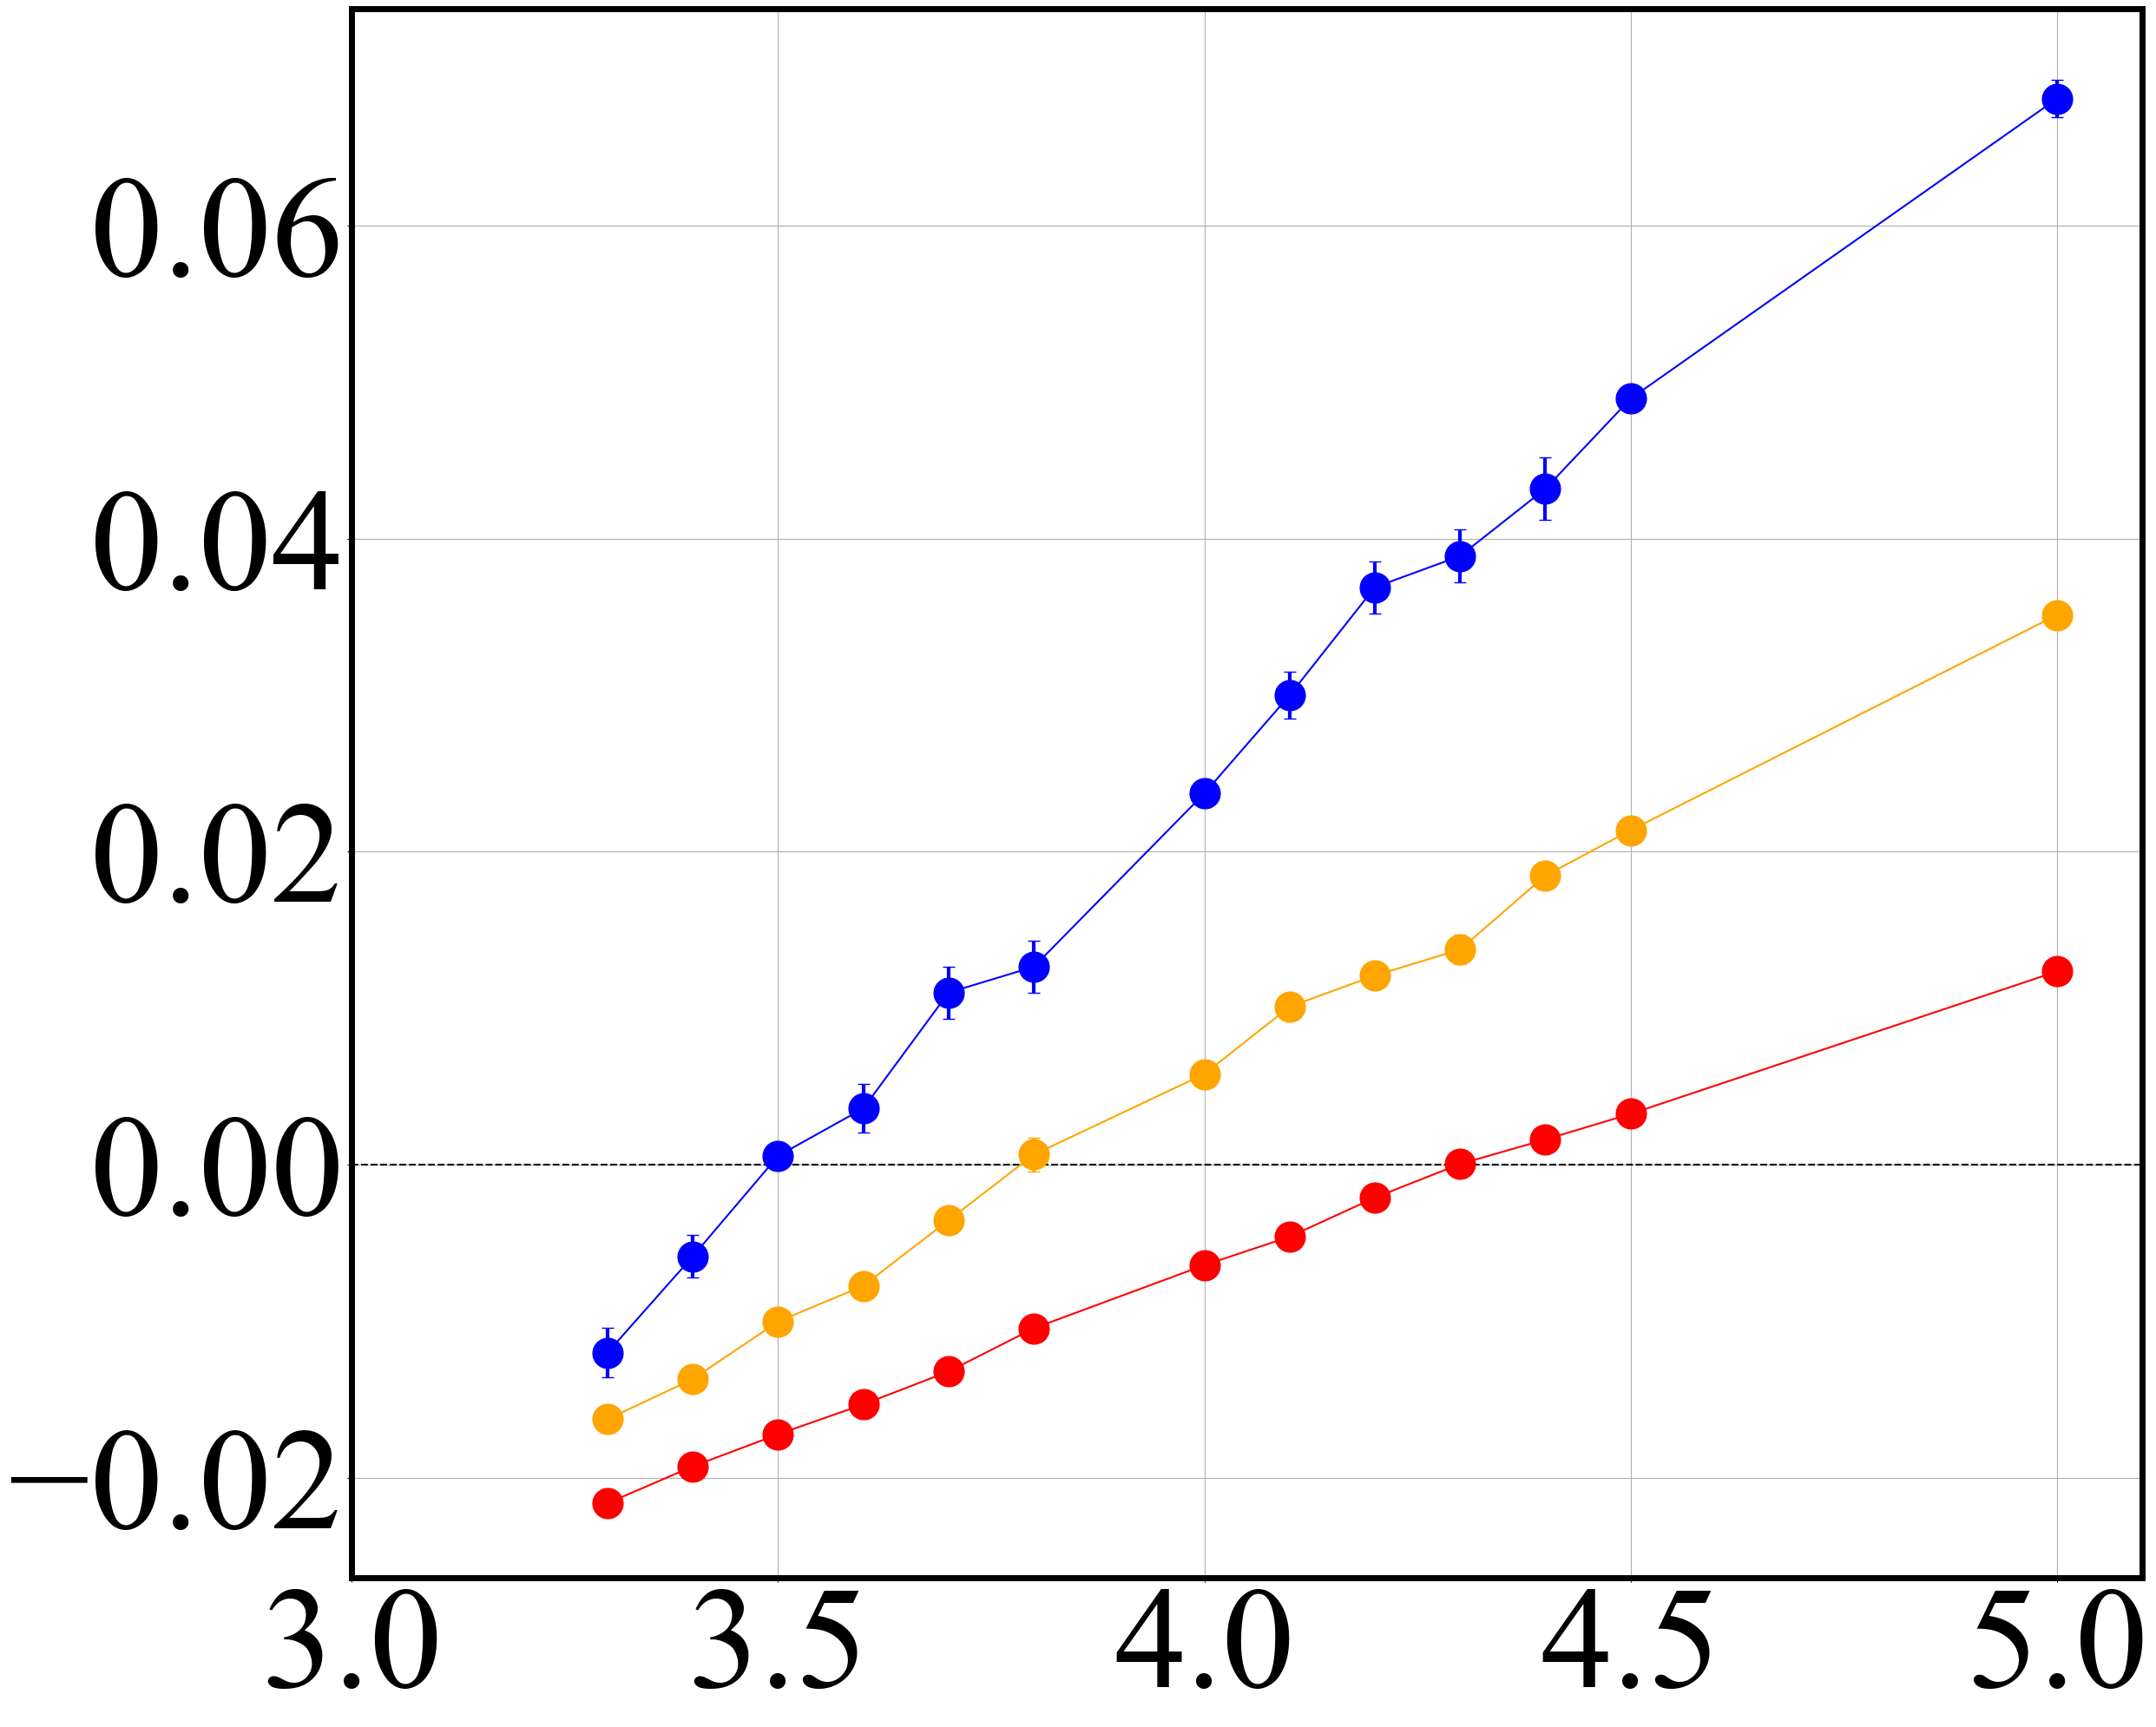

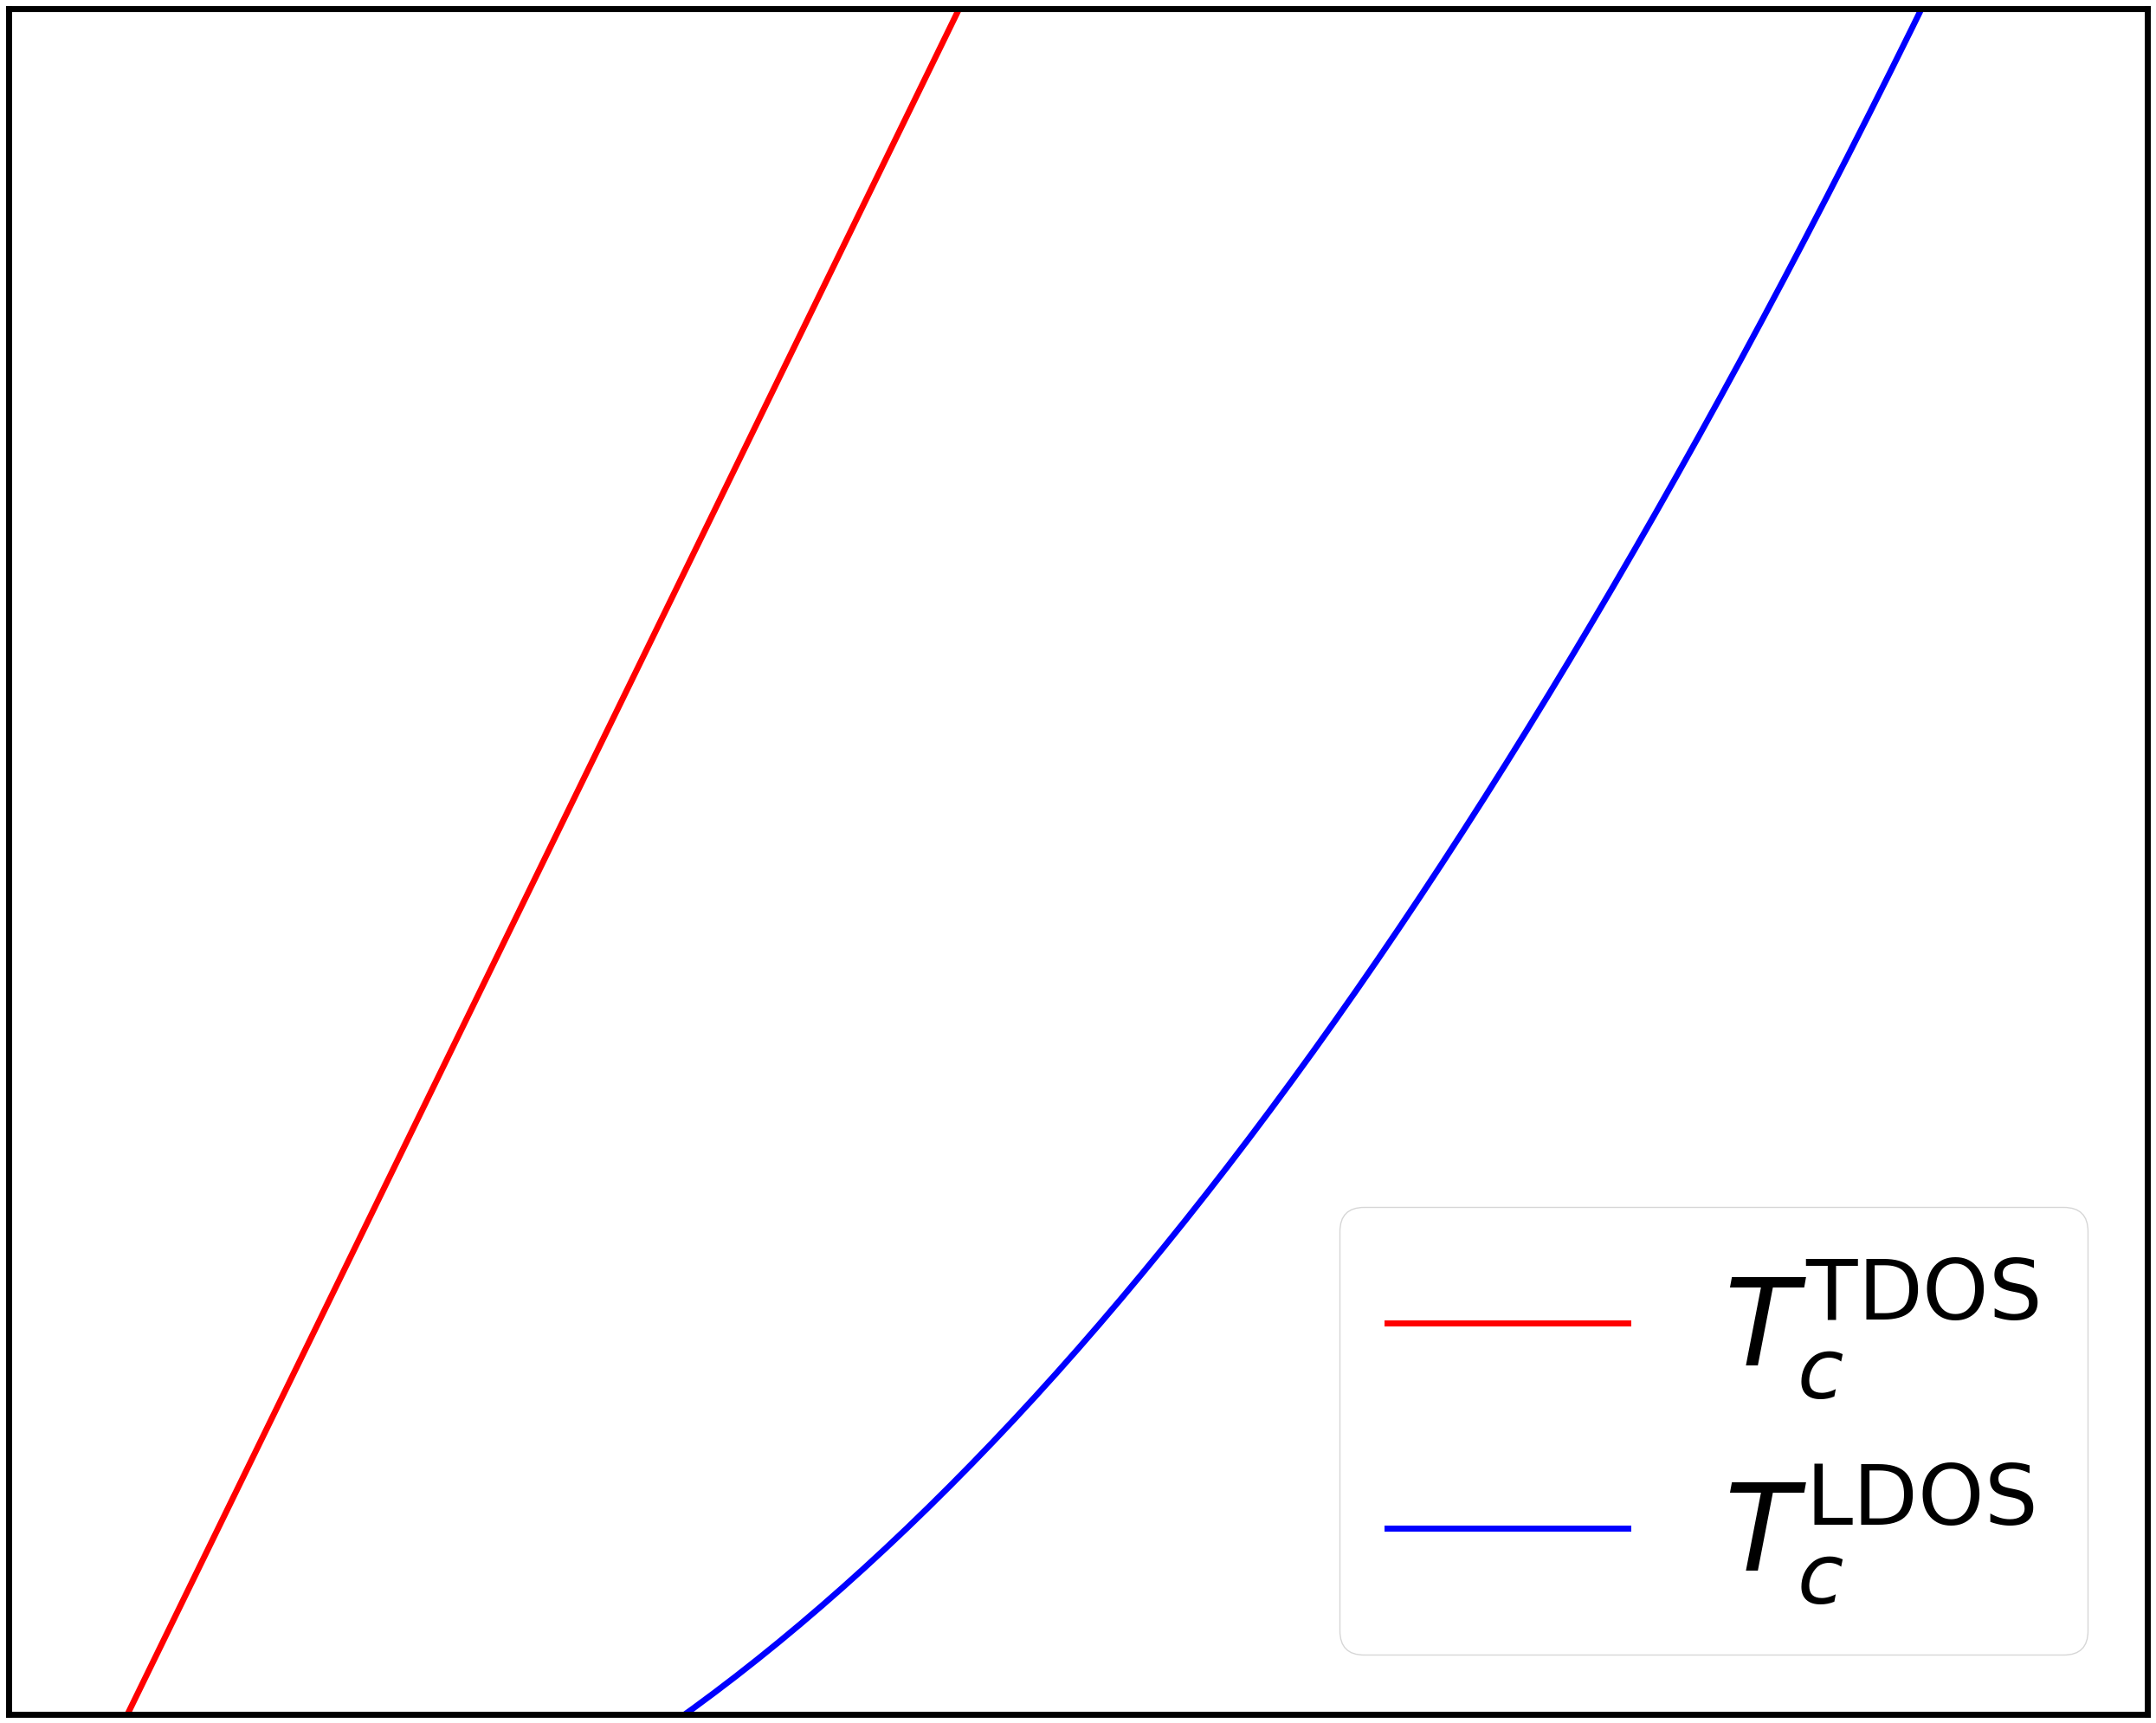

In [21]:
main()

In [ ]:
A = np.arange(0,10)
B = np.reshape(A,(5,2))
C = np.reshape(A,(2,5))

In [ ]:
print(A)

In [ ]:
print(B)

In [ ]:
print(C)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


